In [1]:
import morphs

%matplotlib inline
import seaborn as sns

/usr/local/anaconda/envs/morphs36/lib/python3.6/site-packages/matplotlib/__init__.py:886: MatplotlibDeprecationWarning: 
examples.directory is deprecated; in the future, examples will be found relative to the 'datapath' directory.
  "found relative to the 'datapath' directory.".format(key))
/usr/local/anaconda/envs/morphs36/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
sns.set_context("talk")
folder = morphs.paths.FIGURES_DIR / "neurometrics"

In [3]:
def plot_example_neurometric(block_name, behavior_subj="B1218"):
    block_path = morphs.data.parse.find_a_block_path(block_name)
    subj = morphs.data.parse.bird_id(block_path)
    good_clusters = morphs.data.accuracies.good_clusters(block_path)
    spikes = morphs.load.ephys_data(
        block_path, good_clusters=good_clusters, shuffle_endpoints=True
    )
    X, labels = morphs.spikes.create_neural_rep(spikes, max_id_len=5)
    X_red = morphs.data.neurometric.logistic_dim_reduction(X, labels)
    psychometric_params = morphs.load.psychometric_params()
    held_out_df, g = morphs.plot.neurometric.held_out(
        labels,
        X_red,
        behavior_subj,
        psychometric_params,
        row_order="b",
        col_order="fg",
        legend=False,
    )
    return g

I won't memoize shuffled data so each time you run it you can get a new sample.


/usr/local/anaconda/envs/morphs36/lib/python3.6/site-packages/pandas/core/indexing.py:362: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[key] = _infer_fill_value(value)
/usr/local/anaconda/envs/morphs36/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s
/usr/local/home/mthielk/GitHub/morphs/morphs/plot/neurometric.py:9: RuntimeWarning: overflow encountered in exp
  return A + (K - A) / (1 + np.exp(-B * (x - M)))


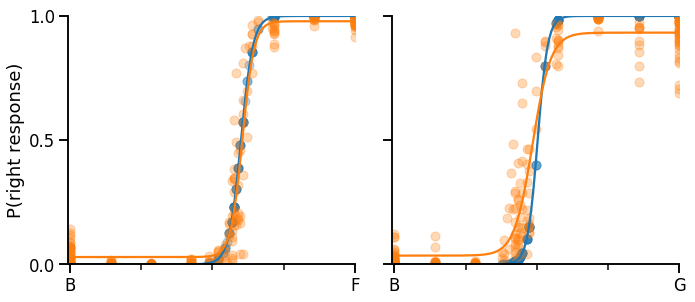

In [4]:
g = plot_example_neurometric(
    "Pen01_Lft_AP2500_ML750__Site04_Z2300__B1101_cat_P01_S04_3"
)
g.set_axis_labels("", "P(right response)")
morphs.plot.savefig(g, "neurometric-sample-1", folder=folder)

I won't memoize shuffled data so each time you run it you can get a new sample.


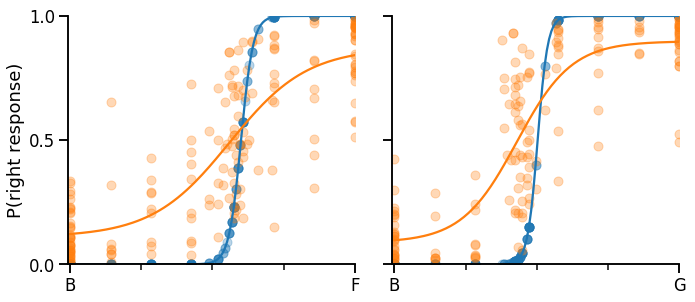

In [5]:
g = plot_example_neurometric(
    "Pen02_Lft_AP2501_ML500__Site03_Z2222__B1101_cat_P02_S03_1"
)
g.set_axis_labels("", "P(right response)")
morphs.plot.savefig(g, "neurometric-sample-2", folder=folder)

I won't memoize shuffled data so each time you run it you can get a new sample.


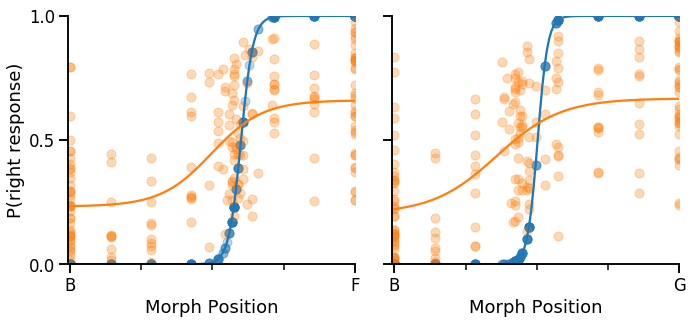

In [6]:
g = plot_example_neurometric(
    "Pen07_Rgt_AP2450_ML100__Site01_Z2500__B1096_cat_P07_S01_9"
)
morphs.plot.savefig(g, "neurometric-sample-3", folder=folder)

In [7]:
accuracies, cluster_accuracies = morphs.load.cluster_accuracies()
good_recs = morphs.data.accuracies.good_recs()

In [8]:
# try to find nice block used below, else use last one found
block_path = morphs.data.parse.find_a_block_path()
subj = morphs.data.parse.bird_id(block_path)
good_clusters = morphs.data.accuracies.good_clusters(block_path)

In [9]:
spikes = morphs.load.ephys_data(
    block_path, good_clusters=good_clusters, shuffle_endpoints=True
)

I won't memoize shuffled data so each time you run it you can get a new sample.


In [10]:
X, labels = morphs.spikes.create_neural_rep(spikes, max_id_len=5)
X_red = morphs.data.neurometric.logistic_dim_reduction(X, labels)
psychometric_params = morphs.load.psychometric_params()

In [11]:
behavior_subj = "B1218"

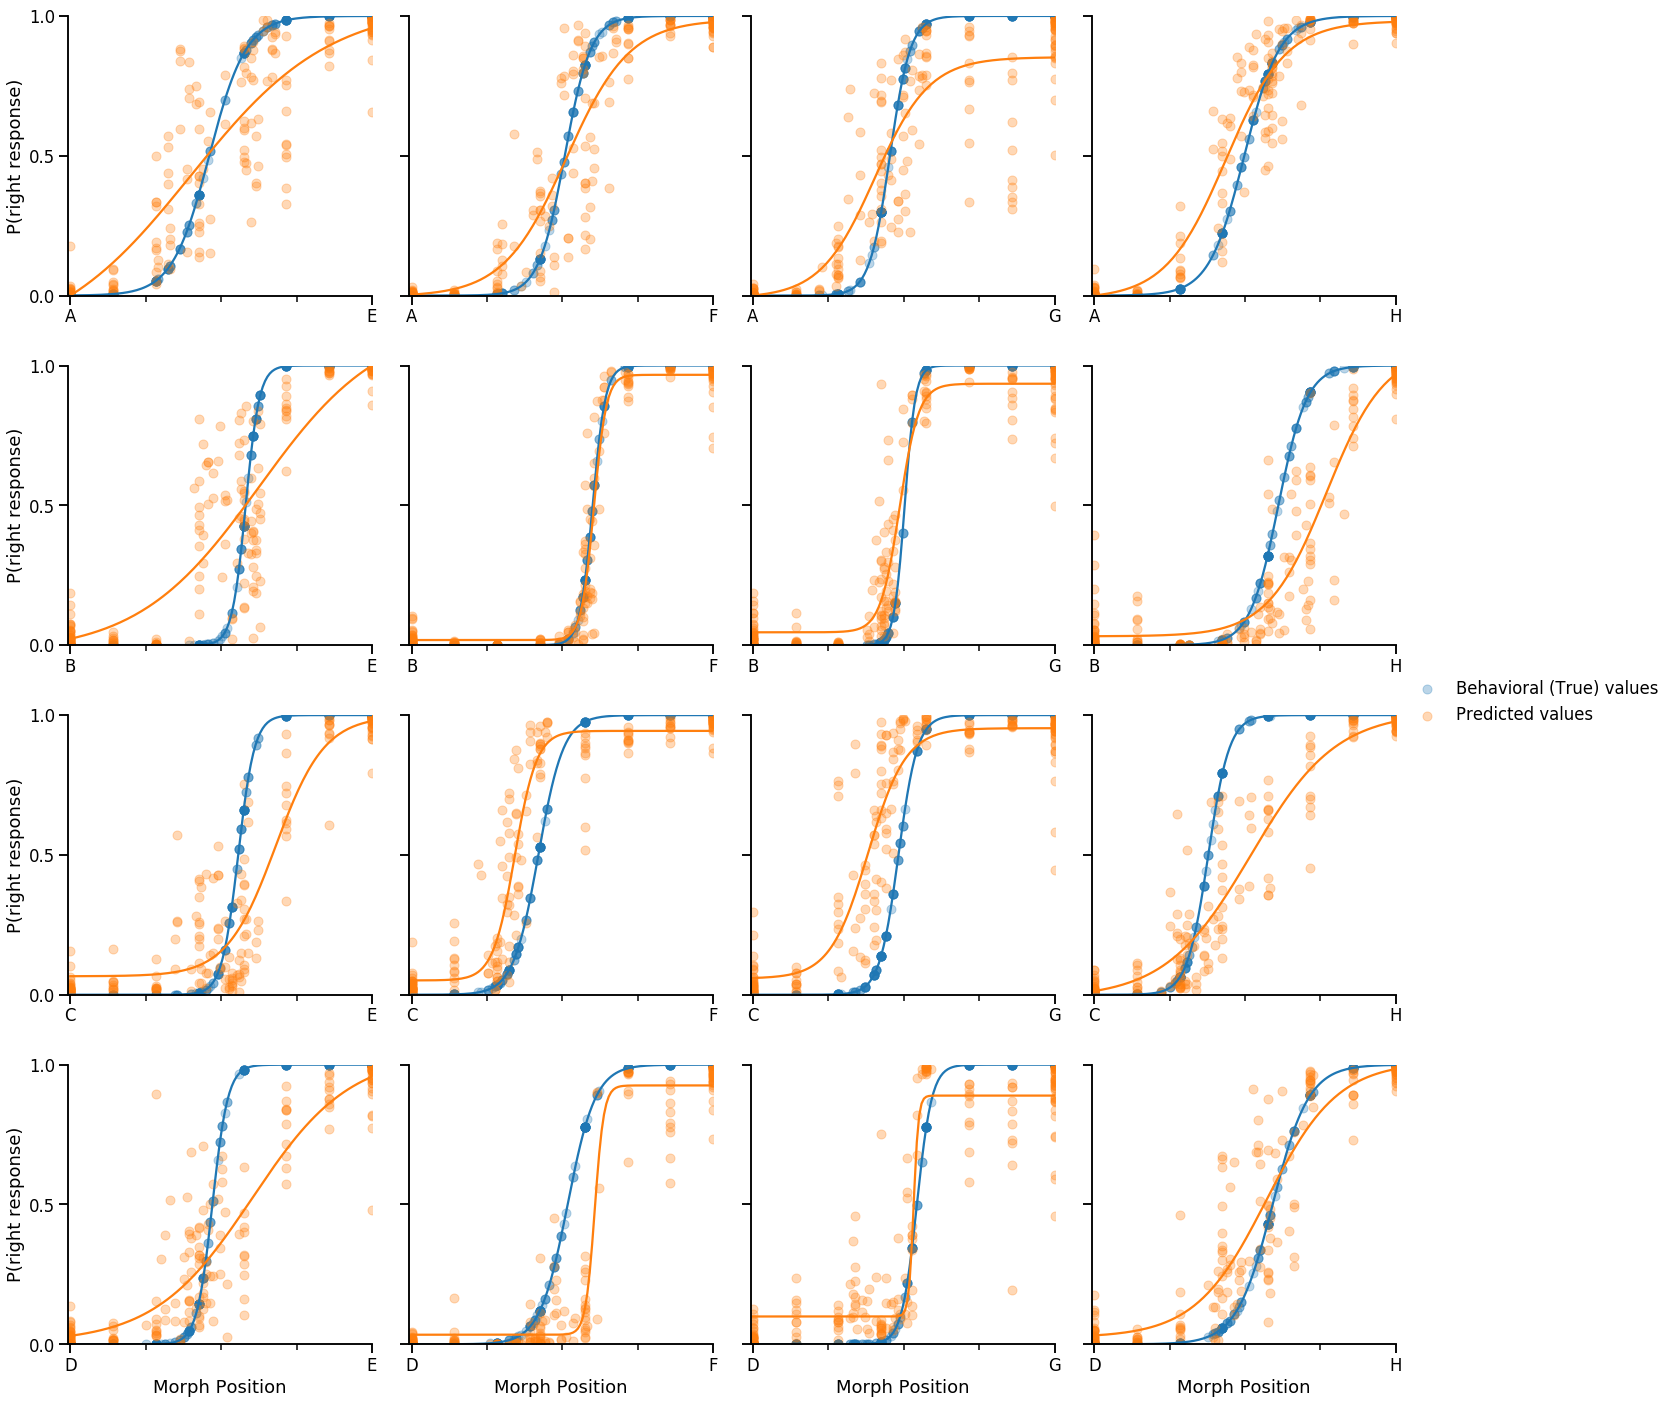

In [12]:
held_out_df, g = morphs.plot.neurometric.held_out(
    labels, X_red, behavior_subj, psychometric_params
)
morphs.plot.savefig(g, "neurometric-sample-all", folder=folder)